In [14]:
import pandas as pd
import seaborn as sns
from os import listdir
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
sns.set_context("talk")

# Convergence error

Erdős–Rényi converged in:
	Floating: 113
	Fixed: 80
Small World converged in:
	Floating: 137
	Fixed: 57
Scale Free converged in:
	Floating: 116
	Fixed: 109


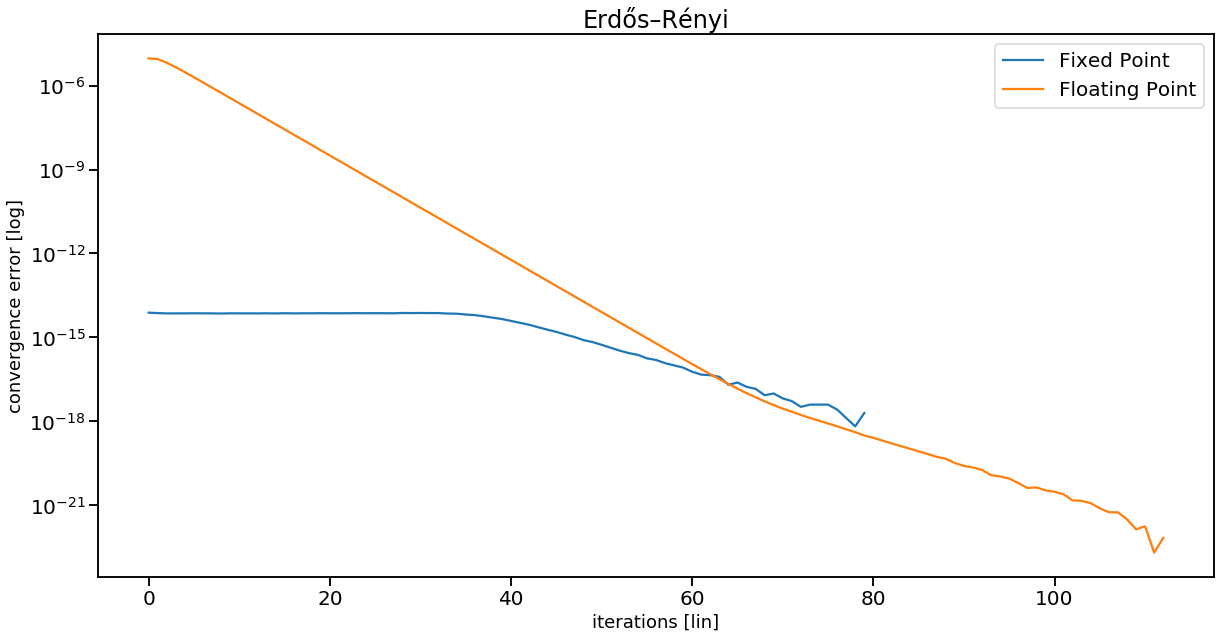

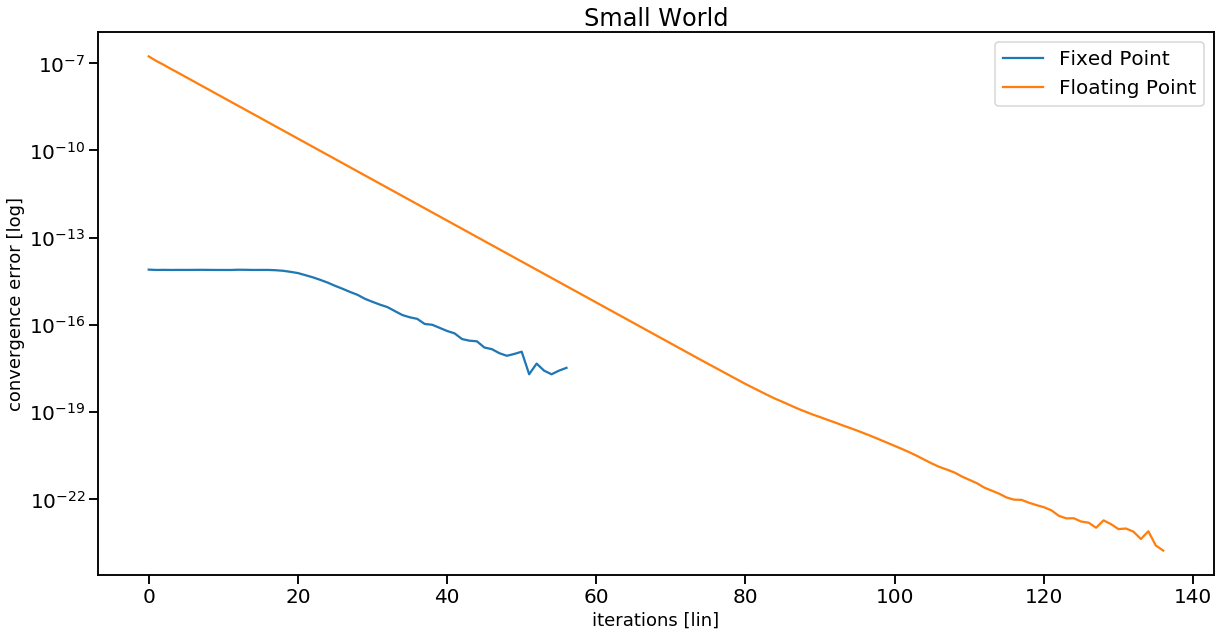

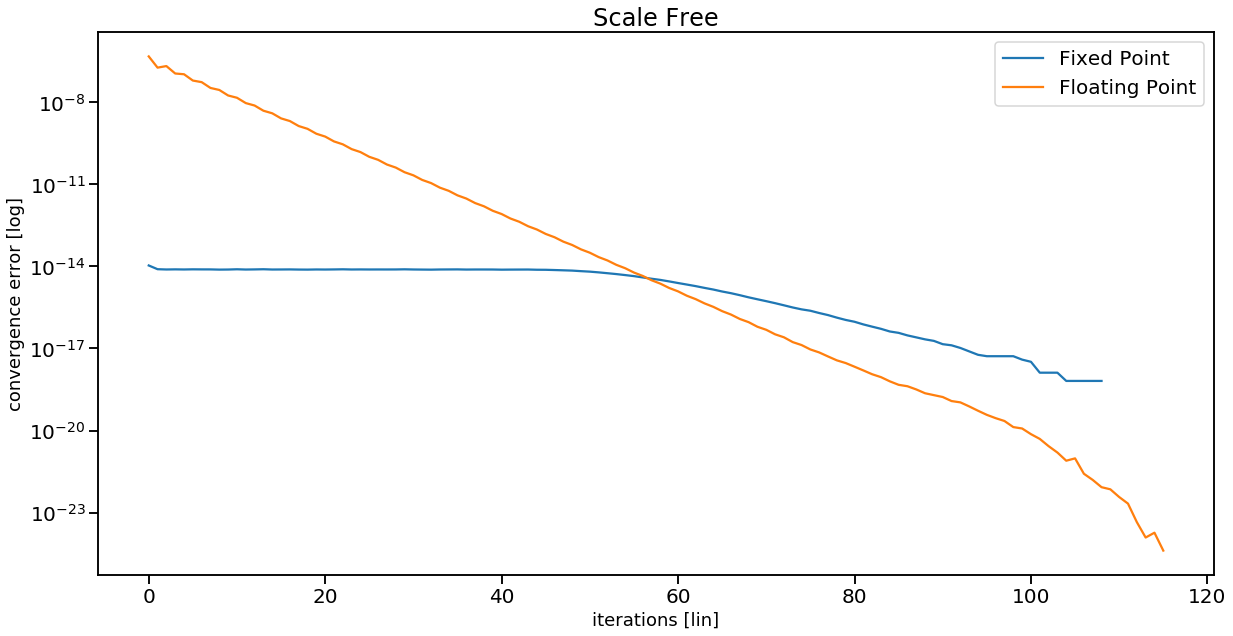

In [15]:
for graph in ["gnp", "smw", "scf"]: 
    
    name_map = {
        "gnp": "Erdős–Rényi", 
        "smw": "Small World", 
        "scf": "Scale Free"
    }
    
    # open fixed point and floating point files 
    fixed_cnv_err = []
    with open(f"./datasets/{graph}/fixed_cnv_err.nst") as f: 
        text = f.read().split('\n')
        text = text[1:]
        parsed_fixed = map(lambda x: x[1:-1].split(','), text)

    # open floating point file [gnp]
    floating_cnv_err = []
    with open(f"./datasets/{graph}/floating_cnv_err.nst") as f: 
        text = f.read().split('\n')
        text = text[1:]
        parsed_float = map(lambda x: x[1:-1].split(','), text)
    
    #parse values
    for el in list(parsed_float)[:-1]: 
        if float(el[1]) != 0.0: 
            floating_cnv_err.append(float(el[1]))
    for el in list(parsed_fixed)[:-1]:
        if int(el[1]) != 0: 
            fixed_cnv_err.append(float(int(el[1]) / (1 << 62)))
        
    figure(figsize=(20, 10))
    ax = sns.lineplot(x = list(range(len(fixed_cnv_err))), y = fixed_cnv_err, label="Fixed Point")
    sns.lineplot(x = list(range(len(floating_cnv_err))), y = floating_cnv_err, ax=ax, label="Floating Point")
    ax.set(yscale="log", ylabel = "convergence error [log]", xlabel = "iterations [lin]")
    ax.set_title(name_map[graph], fontsize=24)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20)
    plt.legend(loc=1, prop={'size': 20})

    plt.savefig(f'figures/convergence_error/{graph}.png')
    
    print(f"{name_map[graph]} converged in:\n\tFloating: {len(floating_cnv_err)}\n\tFixed: {len(fixed_cnv_err)}")
